In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

## Implementing Gradient Descent in 1D

In [30]:
# Define the function and its derivative
def fx(x):
    # Function: f(x) = 3x^2 - 3x + 4
    return 3 * x**2 - 3 * x + 4

def deriv(x):
    # Derivative: f'(x) = 6x - 3
    return 6 * x - 3

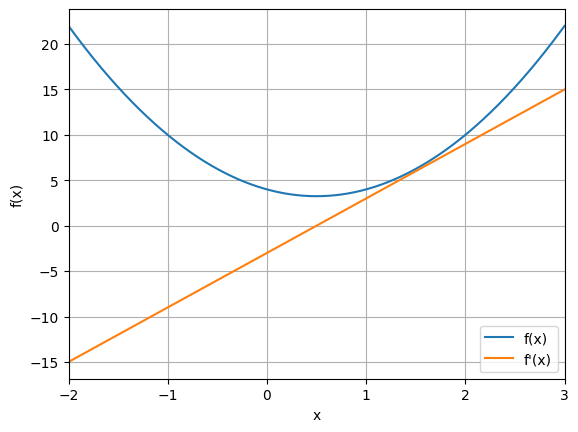

In [31]:
# Generate x values for plotting
x_values = np.linspace(-2, 3, 2001)

# Plot the function and its derivative
plt.plot(x_values, fx(x_values), label='f(x)')
plt.plot(x_values, deriv(x_values), label="f'(x)")
plt.xlim(x_values[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Learning Algorithm

In [32]:
# Gradient Descent Algorithm
# Initialize parameters
w = np.random.choice(x_values, 1)[0]  # Random starting point (scalar)
learning_rate = 0.01  # Learning rate
epochs = 100  # Number of iterations

# Perform gradient descent
for epoch in range(epochs):
    gradient = deriv(w)  # Compute the gradient
    w = w - learning_rate * gradient  # Update the parameter

# Print the final estimated minimum
# Note: Actual local minimum is at x = 0.5
print(f"Estimated local minimum: {w}")

Estimated local minimum: 0.4949552824383645


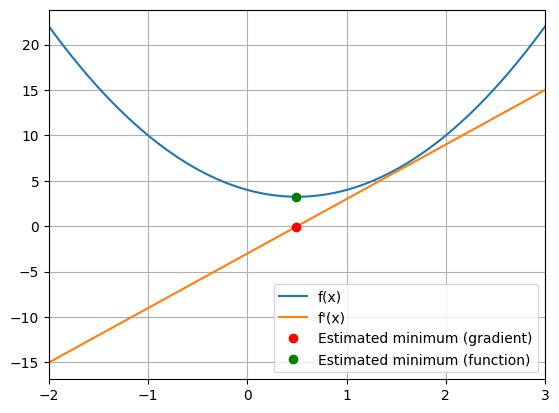

In [33]:
# Plot the function, derivative, and the estimated minimum
plt.plot(x_values, fx(x_values), label='f(x)')
plt.plot(x_values, deriv(x_values), label="f'(x)")
plt.plot(w, deriv(w), 'ro', label='Estimated minimum (gradient)')
plt.plot(w, fx(w), 'go', label='Estimated minimum (function)')
plt.xlim(x_values[[0, -1]])
plt.grid()
plt.legend()
plt.show()

### Store the model parameter and output of each iteration

In [34]:
# Store model parameters and gradients for each iteration
w = np.random.choice(x_values, 1)[0]  # Reinitialize starting point
model_params = np.zeros((epochs, 2))  # Array to store parameters and gradients

for epoch in range(epochs):
    gradient = deriv(w)  # Compute the gradient
    w = w - learning_rate * gradient  # Update the parameter
    model_params[epoch, :] = w, gradient  # Store the parameter and gradient


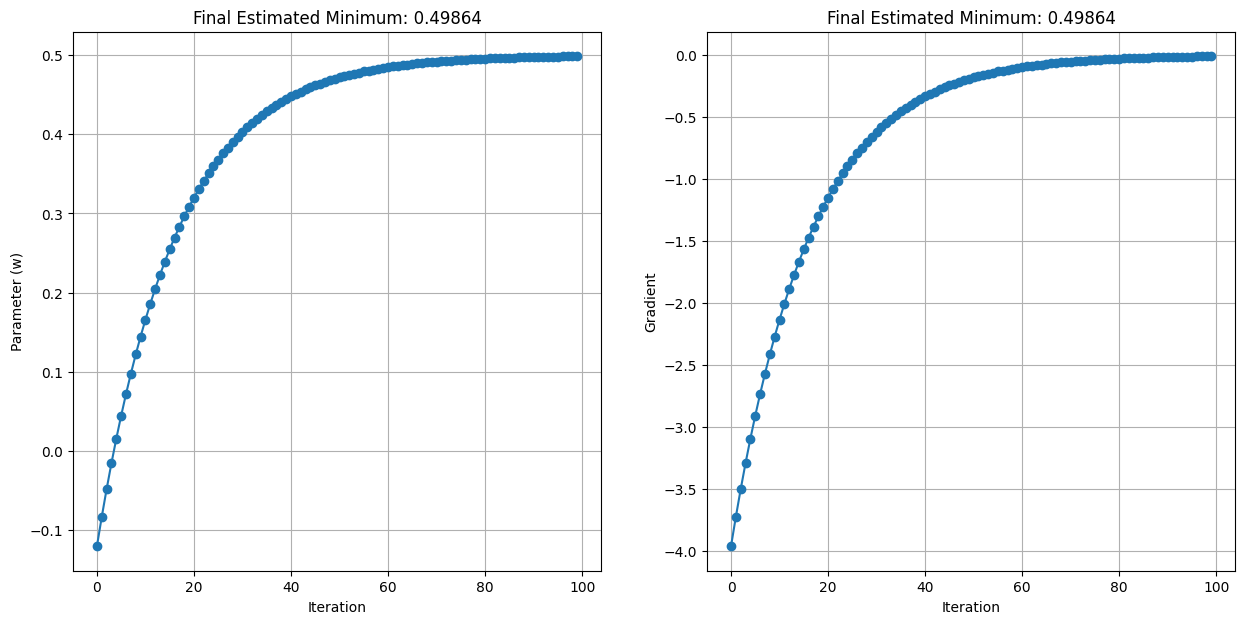

In [35]:
# Plot the parameter and gradient over iterations
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

for i, ax in enumerate(axes):
    ax.plot(model_params[:, i], 'o-')
    ax.set_xlabel('Iteration')
    ax.set_title(f"Final Estimated Minimum: {w:.5f}")
    ax.grid()

axes[0].set_ylabel('Parameter (w)')
axes[1].set_ylabel('Gradient')
plt.show()

### Lets try with a different learning rate

In [36]:
# Function to visualize gradient descent with different learning rates
def plot_gradient_descent(learning_rate):
    # Initialize parameters
    w = np.random.choice(x_values, 1)[0]
    epochs = 100
    model_params = np.zeros((epochs, 2))

    # Perform gradient descent
    for epoch in range(epochs):
        gradient = deriv(w)
        w = w - learning_rate * gradient
        model_params[epoch, :] = w, gradient

    # Plot the parameter and gradient over iterations
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    print(f"Learning Rate: {learning_rate}")

    for i, ax in enumerate(axes):
        ax.plot(model_params[:, i], 'o-')
        ax.set_xlabel('Iteration')
        ax.set_title(f"Final Estimated Minimum: {w:.2f}")
        ax.grid()

    axes[0].set_ylabel('Parameter (w)')
    axes[1].set_ylabel('Gradient')
    plt.show()
    

Learning Rate: 0.01


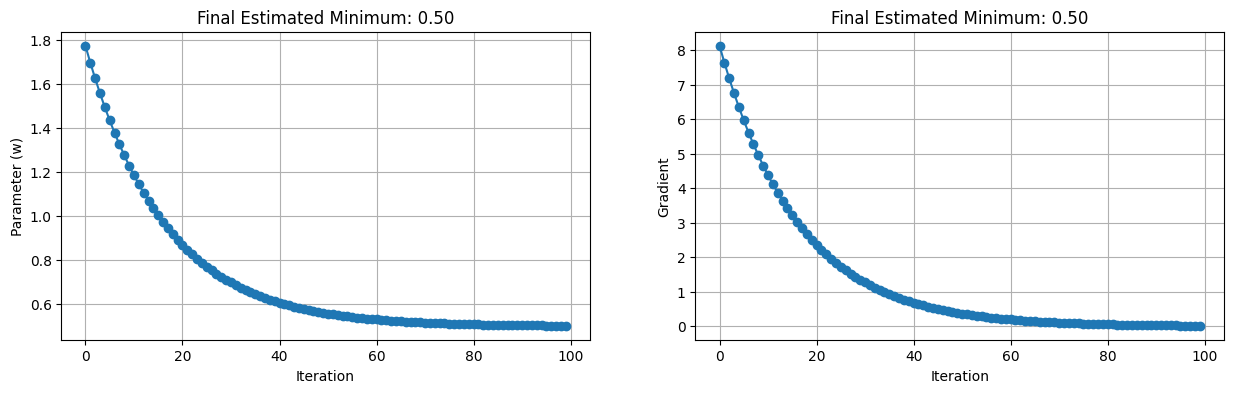

Learning Rate: 0.1


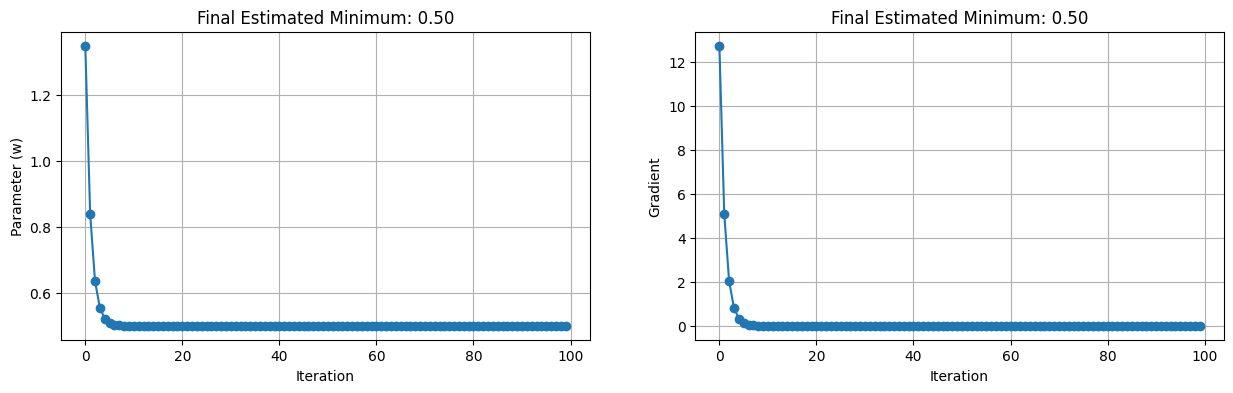

Learning Rate: 0.4


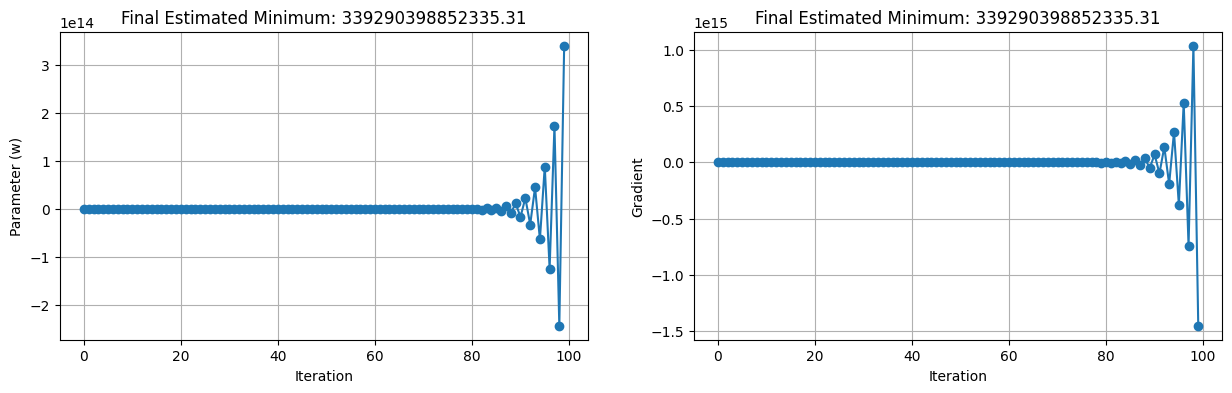

In [37]:
# Test gradient descent with different learning rates
for lr in [0.01, 0.1, 0.4]:
    plot_gradient_descent(lr)

## Implementing Gradient Descent in 2D

In [38]:
# Define the 2D peaks function
def peaks(x, y):
    # Expand to a 2D mesh
    x, y = np.meshgrid(x, y)
    
    # Compute the peaks function
    z = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2) \
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2) \
        - 1 / 3 * np.exp(-(x + 1)**2 - y**2)
    return z

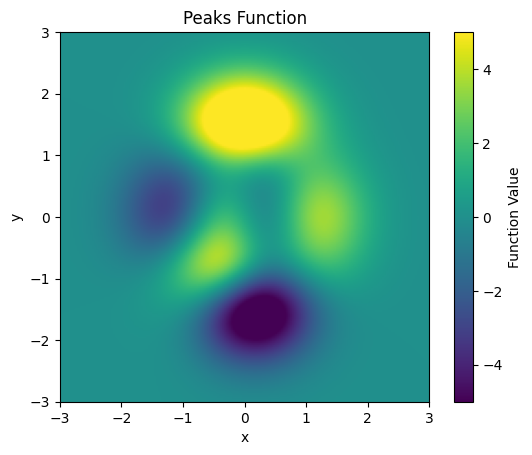

In [39]:
# Generate x and y values for the 2D grid
x_values = np.linspace(-3, 3, 201)
y_values = np.linspace(-3, 3, 201)

# Compute the peaks function
Z = peaks(x_values, y_values)

# Visualize the peaks function
plt.imshow(Z, extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], vmin=-5, vmax=5, origin='lower')
plt.colorbar(label='Function Value')
plt.title('Peaks Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [40]:
# Create derivative functions using sympy
# Define symbolic variables
sx, sy = sym.symbols('sx, sy')

# Define the symbolic peaks function
sZ = 3 * (1 - sx)**2 * sym.exp(-(sx**2) - (sy + 1)**2) \
     - 10 * (sx / 5 - sx**3 - sy**5) * sym.exp(-sx**2 - sy**2) \
     - 1 / 3 * sym.exp(-(sx + 1)**2 - sy**2)

# Compute the symbolic derivatives
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'numpy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'numpy')

# Test the derivative functions
print(f"df_x(1, 1): {df_x(1, 1)}")
print(f"df_y(1, 1): {df_y(1, 1)}")

df_x(1, 1): -1.0736983365607882
df_y(1, 1): 1.8991859299786347


In [41]:
# Gradient Descent in 2D

# Initialize a random starting point (uniform between -2 and +2)
start_point = np.random.rand(2) * 4 - 2  # Random starting point
current_point = start_point.copy()  # Copy to avoid modifying the original

# Learning parameters
learning_rate = 0.01
epochs = 1000

# Store the trajectory of the gradient descent
trajectory = np.zeros((epochs, 2))

# Perform gradient descent
for epoch in range(epochs):
    # Compute the gradient at the current point
    gradient = np.array([df_x(current_point[0], current_point[1]),
                         df_y(current_point[0], current_point[1])])
    
    # Update the current point
    current_point = current_point - learning_rate * gradient
    
    # Store the current point in the trajectory
    trajectory[epoch, :] = current_point

# Print the final estimated minimum
print(f"Starting Point: {start_point}")
print(f"Estimated Local Minimum: {current_point}")

Starting Point: [ 0.86838158 -1.72144039]
Estimated Local Minimum: [ 0.22827892 -1.62553496]


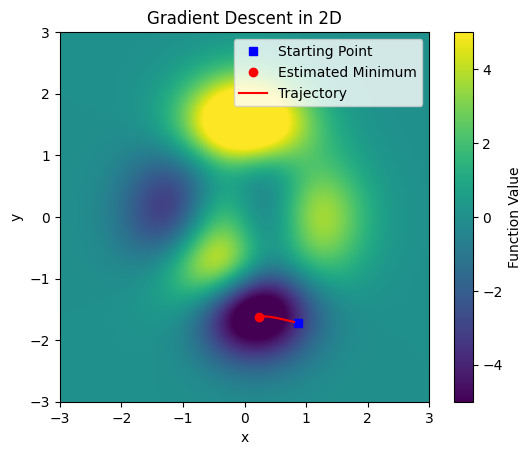

In [42]:
# Visualize the gradient descent trajectory
plt.imshow(Z, extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(start_point[0], start_point[1], 'bs', label='Starting Point')
plt.plot(current_point[0], current_point[1], 'ro', label='Estimated Minimum')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', label='Trajectory')
plt.colorbar(label='Function Value')
plt.title('Gradient Descent in 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()